# How to extract tables from PDFs and from web pages
## use of packages:
- tabula-py 
- pandas
- matplotlib for plotting

In [13]:
from tabula import read_pdf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
df = read_pdf("n6.pdf");df

In [ ]:
df['V (m/s)']

In [ ]:
%matplotlib notebook
from matplotlib import pyplot as plt
plt.plot(df['sn (MPa)'],df['mss'],'.');plt.title('friction vs. normal stress')

In [ ]:
df.iloc[0,0]

In [ ]:
df.iloc[1,0],df.iloc[1,1],float(df.iloc[1,2]),df.iloc[1,6]

In [ ]:
for n in range(1,10):
    print(df.iloc[n,0],df.iloc[n,1],float(df.iloc[n,2]),df.iloc[n,6])

In [ ]:
mmuss=np.mean([df.iloc[n,6] for n in range(1,10)]); mmuss

In [ ]:
[df.iloc[n,0] for n in range(1,10)]

# Reading tables from html web pages

let's look at this page with statistics on natural hazards:

https://earthquake.usgs.gov/earthquakes/browse/stats.php

There are five different tables; we import them all by default in a list called "toto. 
The tables will be identified by toto[0] to toto[5].
Then we can extract information from the columns and lines of interest, and plot them (for example).

In [9]:
#toto=pd.read_html('https://earthquake.usgs.gov/earthquakes/browse/stats.php',header=None)
toto=pd.read_html('https://earthquake.usgs.gov/earthquakes/browse/stats.php')
toto[0]

,Magnitude,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,8.0+,1,1,0,1,2,1,2,4,0,1,1,1,2,2,1,1,0.0,1.0,1.0
1,7–7.9,14,15,13,14,14,10,9,14,12,16,23,19,12,17,11,18,16.0,6.0,16.0
2,6–6.9,146,121,127,140,141,140,142,178,168,144,150,185,108,123,143,127,130.0,104.0,117.0
3,5–5.9,1344,1224,1201,1203,1515,1693,1712,2074,1768,1896,2209,2276,1401,1453,1574,1419,1550.0,1455.0,1674.0
4,EstimatedDeaths,231,21357,1685,33819,298101,87992,6605,708,88708,1790,226050,21942,689,1572,756,9624,NaN,NaN,NaN


In [10]:
toto[2]

,Magnitude,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,8+,0,0,0,0,2,2,1,0,1,0
1,7–7.9,18,16,13,12,11,18,14,16,11,18
2,6–6.9,109,96,166,137,146,183,149,120,117,116
3,5–5.9,1617,1457,1498,1426,1542,1318,1222,1113,979,1104
4,EstimatedDeaths,52056,3210,3920,10096,1634,7980,589,3069,9430,22662


We can now plot deaths vs. years

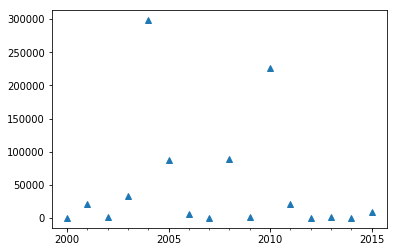

In [52]:
import matplotlib.ticker as ticker
fig,ax=plt.subplots()
ax.plot(toto[0].iloc[4].iloc[1:17],'^')
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

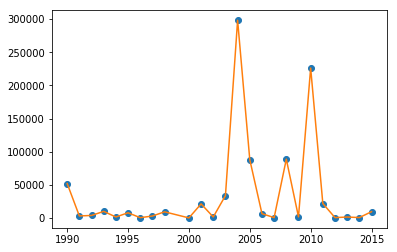

In [53]:
# combine table 1 and 3 together, extracting line 4, then plot all:
hlist1=toto[0].columns.get_values()
hlist2=toto[2].columns.get_values()
year1=[];deaths1=[];year2=[];deaths2=[]
for i in range(1,17): year1.append(int(hlist1[i]));
for i in range(1,17): deaths1.append(int(toto[0].iloc[4][i])); 
for i in range(1,10): year2.append(int(hlist2[i]));
for i in range(1,10): deaths2.append(int(toto[2].iloc[4][i]));
years=year2+year1;
deaths=deaths2+deaths1
fig,ax=plt.subplots();
ax.plot(years,deaths,'o');
ax.plot(years,deaths,'-');